# SEIR with n stages
This is the Python version of program 3.5 from page 94 of "Modeling Infectious Disease in humans and animals" by Keeling & Rohani.
This is based on code written by Ilias Soumpasis.

In [2]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Parameters (rates here are specified in terms of days)

n=13 #stages in the infected period
m=8  #stages in the exposed period
gamma=1/13. #recovery rate
beta=17/5. #transmission rate
mu=1./(55*365) #natural death rate

#initial conditions
S0=0.05   #initial susceptible fraction
I0=0.00001#initial infected fraction

ND=MaxTime=30*365. #number of days (30 years)
TS=1.0            #time step (one day)


#####################################################################################
### To be compatible with other versions of programs the 
### following options are available. To try some of them
### uncomment the code (remove '#'):
#####################################################################################
### As well as the default, you may want to compare the structured model:
#( n, m, beta, gamma, mu, S0, I0, ND )=(10.0, 0.0, 1.0, 0.1, 0.0, 0.5, 1e-6, 60.);
### with the unstructured version
#( n, m, beta, gamma, mu, S0, I0, ND )=(1.0, 0.0, 1.0, 0.1, 0.0, 0.5, 1e-6, 60.);
### Or compare the SEIR:
#( n, m, beta, gamma, mu, S0, I0, ND )=(10.0, 5.0, 1.0, 0.1, 0.0, 0.5, 1e-4, 150.);
### with the unstructured version
#( n, m, beta, gamma, mu, S0, I0, ND )=(2.0, 1.0, 1.0, 0.1, 0.0, 0.5, 1e-4, 150.);
#####################################################################################

I0=I0*np.ones((n))/n
INPUT=np.hstack((S0,I0))


In [4]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((n+1))
	V = INP
	Y[0] = mu - beta * sum(V[range(m+1,n+1)]) * V[0] - mu * V[0]
	Y[1] = beta * sum(V[range(m+1,n+1)]) * V[0] - gamma*n*V[1] - mu * V[1]
	for i in range(2,n+1):
		Y[i] = gamma*n*V[i-1] - gamma*n*V[i] - mu * V[i]
	return Y   # For odeint

In [5]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

REST=np.zeros(len(RES), 'float') #total infected
for i in range(1,n+1):
	REST += RES[:,i]

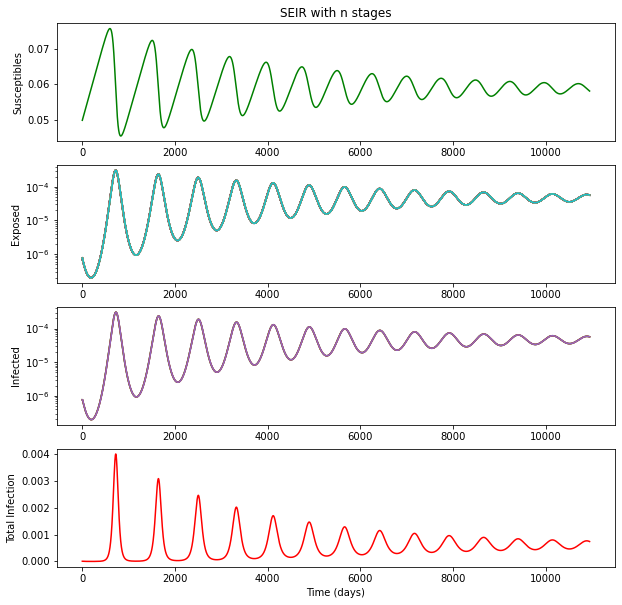

In [29]:
##Ploting
fig=plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('SEIR with n stages')

fig.add_subplot(411)
plt.plot(RES[:,0], 'g-', label='Susc')
plt.ylabel('Susceptibles')

fig.add_subplot(412)
if m>0: #ie if exposed class exists
	for i in range(1,(n+1-m)):
		for j in range(1,m+1):
			plt.semilogy(RES[:,j], label='Exposed')
	plt.ylabel('Exposed')

fig.add_subplot(413)
if m>0:
    for i in range(1,(n+1-m)):
        plt.semilogy(RES[:,(i+m)], label='Infectious')
    plt.ylabel('Infected')

    
fig.add_subplot(414)

if n>1: #if more than one stage in infected class
	plt.plot(REST, 'r-',label='Infec')
else:
	plt.plot(RES[:,1], 'r-',label='Infec')
plt.ylabel('Total Infection')
plt.xlabel('Time (days)')

plt.show()
fig.savefig('SEIR_stages.pdf')